# DATA620: Assignment 8 - High Frequency Words

## Homework Team 3: David Simbandumwe, Eric Lehmphul and Lidiia Tronina

1. Choose a corpus of interest.
2. How many total unique words are in the corpus? (Please feel free to define unique words in any interesting, defensible way).
3. Taking the most common words, how many unique words represent half of the total words in the corpus?
4. Identify the 200 highest frequency words in this corpus.
5. Create a graph that shows the relative frequency of these 200 words.
6. Does the observed relative frequency of these words follow Zipf’s law? Explain.
7. In what ways do you think the frequency of the words in this corpus differ from “all words in all corpora.

### Load Required Packages

In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import nltk
from nltk.corpus import inaugural
warnings.filterwarnings("ignore")
nltk.download('inagural')
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/lidiiatronina/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

### 1. Choose a corpus of interest.

Presidents’ words matter. For better or worse, presidential rhetoric tells the American people who they are. That's why we decided to look at the inaugural speeches from the freely available library that can be downloaded from the NLTK package. The corpus is a collection of 55 texts, one for each presidential address.

In [42]:
inaugural.fileids()

['1789-Washington.txt',
 '1793-Washington.txt',
 '1797-Adams.txt',
 '1801-Jefferson.txt',
 '1805-Jefferson.txt',
 '1809-Madison.txt',
 '1813-Madison.txt',
 '1817-Monroe.txt',
 '1821-Monroe.txt',
 '1825-Adams.txt',
 '1829-Jackson.txt',
 '1833-Jackson.txt',
 '1837-VanBuren.txt',
 '1841-Harrison.txt',
 '1845-Polk.txt',
 '1849-Taylor.txt',
 '1853-Pierce.txt',
 '1857-Buchanan.txt',
 '1861-Lincoln.txt',
 '1865-Lincoln.txt',
 '1869-Grant.txt',
 '1873-Grant.txt',
 '1877-Hayes.txt',
 '1881-Garfield.txt',
 '1885-Cleveland.txt',
 '1889-Harrison.txt',
 '1893-Cleveland.txt',
 '1897-McKinley.txt',
 '1901-McKinley.txt',
 '1905-Roosevelt.txt',
 '1909-Taft.txt',
 '1913-Wilson.txt',
 '1917-Wilson.txt',
 '1921-Harding.txt',
 '1925-Coolidge.txt',
 '1929-Hoover.txt',
 '1933-Roosevelt.txt',
 '1937-Roosevelt.txt',
 '1941-Roosevelt.txt',
 '1945-Roosevelt.txt',
 '1949-Truman.txt',
 '1953-Eisenhower.txt',
 '1957-Eisenhower.txt',
 '1961-Kennedy.txt',
 '1965-Johnson.txt',
 '1969-Nixon.txt',
 '1973-Nixon.txt',
 '1

An interesting property of this collection is its time dimension. To get the year out of the filename, we extracted the first four characters.

In [43]:
[fileid[:4] for fileid in inaugural.fileids()]

['1789',
 '1793',
 '1797',
 '1801',
 '1805',
 '1809',
 '1813',
 '1817',
 '1821',
 '1825',
 '1829',
 '1833',
 '1837',
 '1841',
 '1845',
 '1849',
 '1853',
 '1857',
 '1861',
 '1865',
 '1869',
 '1873',
 '1877',
 '1881',
 '1885',
 '1889',
 '1893',
 '1897',
 '1901',
 '1905',
 '1909',
 '1913',
 '1917',
 '1921',
 '1925',
 '1929',
 '1933',
 '1937',
 '1941',
 '1945',
 '1949',
 '1953',
 '1957',
 '1961',
 '1965',
 '1969',
 '1973',
 '1977',
 '1981',
 '1985',
 '1989',
 '1993',
 '1997',
 '2001',
 '2005',
 '2009',
 '2013',
 '2017',
 '2021']

### 2. How many total unique words are in the corpus? (Please feel free to define unique words in any interesting, defensible way).

There are a total of 152901 words in the corpus.

In [48]:
# Count ALL words
all_words = inaugural.words()
len(all_words)

152901

In [45]:
#Washington's speech
inaugural.words('1789-Washington.txt')

['Fellow', '-', 'Citizens', 'of', 'the', 'Senate', ...]

In [52]:
nltk.FreqDist(all_words).most_common(20)

[('the', 9555),
 (',', 7275),
 ('of', 7169),
 ('and', 5226),
 ('.', 5011),
 ('to', 4477),
 ('in', 2604),
 ('a', 2229),
 ('our', 2062),
 ('that', 1769),
 ('be', 1505),
 ('is', 1477),
 ('we', 1281),
 ('for', 1141),
 ('by', 1063),
 ('it', 1036),
 ('have', 1029),
 ('which', 1007),
 ('not', 972),
 ('will', 935)]

There are 10025 unique words in this data. Looking at the sample of our words above, we can see that it includes punctuation as well as stopwords, such as 'the' and 'of'. These words are meaningless for research. We also know that python will see capital letters as distinct from lowercase letters, so we need to convert all words to lowercase and remove punctuation, some common words, and numbers to get only the unique words.

In [221]:
len(set(all_words))

10025

Removing stopwords can be done by calling the stopwords corpus in NLTK, which contain the common
high-frequency words with no practical meaning.

In [121]:
#remove stopwords 
stop_words = set( stopwords.words( 'english' ) ) 
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [213]:
filtered_words = [ word for word in text if word not in stop_words ] 

In [216]:
len(filtered_words)

65522

In [222]:
len(set(filtered_words))

9062

In [162]:
#remove punctuation
custom_stopwords = set((',', '.', ';', '?', '-', '!', '(', ')','--','"',"'", ':', '¡¦', '¡','', '9', '/', '11','ii', '400','1863','','us',',"'))

In [215]:
filtered_words2 = [ word for word in filtered_words if word not in custom_stopwords ] 

In [217]:
len(filtered_words2)

65018

In [223]:
len(set(filtered_words2))

9060

After we filtered out all unnecessary words, we got 9060 unique words in the corpus.

### 3. Taking the most common words, how many unique words represent half of the total words in the corpus?

There is a total of 65018 words in the corpus. That is excluding filtered out words.The following 493 unique words represent half of the these words.

In [225]:
half_words = nltk.FreqDist(filtered_words2)     
#print(*[w for w,n in fdist.most_common()[:332]], sep = ", ")    
tw=len(filtered_words2)
tcount=0
wcount=0
for word, count in half_words.most_common():
    tcount=tcount+count
    wcount=wcount+1
    if tcount>(tw/2):
        print(wcount)
        break

493


In [226]:
print(*[w for w,n in half_words.most_common()[:493]], sep = ", ")

government, people, must, upon, great, world, may, states, nation, country, shall, every, one, peace, new, citizens, power, america, public, time, would, constitution, united, nations, union, freedom, war, free, american, let, fellow, national, made, good, men, make, years, well, justice, life, without, spirit, rights, never, law, congress, laws, work, liberty, right, best, duty, hope, interests, know, god, today, much, many, state, among, political, history, foreign, long, first, man, powers, day, future, executive, policy, president, principles, progress, part, human, within, whole, ever, common, duties, support, administration, faith, system, far, together, confidence, service, purpose, present, way, less, still, yet, americans, necessary, party, always, come, better, force, strength, high, believe, need, old, equal, institutions, interest, others, office, general, things, land, could, means, even, home, place, federal, democracy, prosperity, give, change, might, secure, action, ano

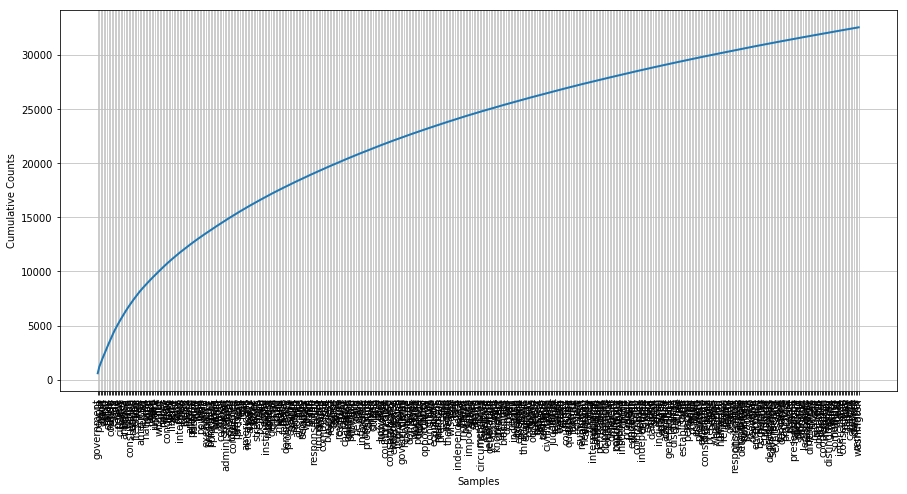

In [228]:
plt.figure(figsize=(15,7))
half_words.plot(493, cumulative = True)

The cumulative word count for the first 493 words in the plot below matches to the expected value of 32 609

### 4. Identify the 200 highest frequency words in this corpus.

#### 200 highest frequency words:

In [235]:
fdist = nltk.FreqDist(filtered_words2)
fdist.most_common(200) 

[('government', 600),
 ('people', 594),
 ('must', 374),
 ('upon', 371),
 ('great', 346),
 ('world', 346),
 ('may', 343),
 ('states', 335),
 ('nation', 330),
 ('country', 322),
 ('shall', 316),
 ('every', 301),
 ('one', 272),
 ('peace', 259),
 ('new', 255),
 ('citizens', 248),
 ('power', 241),
 ('america', 240),
 ('public', 227),
 ('time', 223),
 ('would', 213),
 ('constitution', 209),
 ('united', 204),
 ('nations', 199),
 ('union', 191),
 ('freedom', 189),
 ('war', 185),
 ('free', 184),
 ('american', 171),
 ('let', 160),
 ('fellow', 158),
 ('national', 158),
 ('made', 156),
 ('good', 150),
 ('men', 149),
 ('make', 147),
 ('years', 143),
 ('well', 142),
 ('justice', 142),
 ('life', 140),
 ('without', 140),
 ('spirit', 140),
 ('rights', 138),
 ('never', 137),
 ('law', 136),
 ('congress', 130),
 ('laws', 130),
 ('work', 124),
 ('liberty', 123),
 ('right', 122),
 ('best', 122),
 ('duty', 120),
 ('hope', 120),
 ('interests', 115),
 ('know', 112),
 ('god', 112),
 ('today', 112),
 ('much', 11

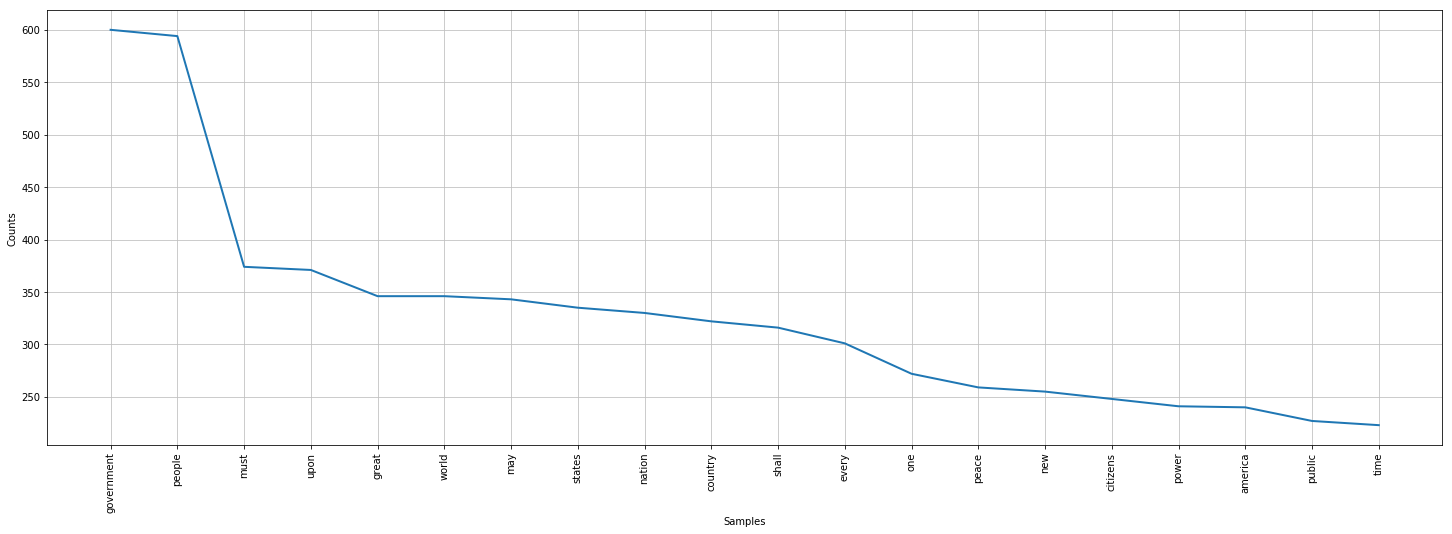

In [236]:
fdist.plot(20) 

#### Top 10 words for each inaguaral speech

In [234]:
for text in text_data['filename']:
    print (text)
    word_list = inaugural.words(text)
    word_list = [w.lower() for w in word_list]  # handle the case sensitivity
    filtered_words = [word for word in word_list if word not in stopwords.words('english') and \
                      word not in custom_stopwords]
    print(nltk.FreqDist(filtered_words).most_common(10))


1789-Washington.txt
[('every', 9), ('government', 8), ('public', 6), ('may', 6), ('citizens', 5), ('present', 5), ('country', 5), ('one', 4), ('ought', 4), ('duty', 4)]
1793-Washington.txt
[('shall', 3), ('oath', 2), ('fellow', 1), ('citizens', 1), ('called', 1), ('upon', 1), ('voice', 1), ('country', 1), ('execute', 1), ('functions', 1)]
1797-Adams.txt
[('people', 20), ('government', 16), ('may', 13), ('nations', 11), ('country', 10), ('nation', 9), ('states', 9), ('foreign', 8), ('constitution', 8), ('honor', 7)]
1801-Jefferson.txt
[('government', 12), ('may', 8), ('fellow', 7), ('citizens', 7), ('let', 7), ('shall', 6), ('principle', 6), ('would', 6), ('one', 6), ('man', 6)]
1805-Jefferson.txt
[('public', 14), ('citizens', 10), ('may', 10), ('fellow', 8), ('state', 8), ('among', 7), ('shall', 7), ('constitution', 6), ('time', 6), ('limits', 5)]
1809-Madison.txt
[('nations', 6), ('public', 6), ('well', 5), ('country', 4), ('peace', 4), ('rights', 4), ('states', 4), ('confidence', 3),

[('government', 16), ('must', 10), ('believe', 10), ('world', 9), ('people', 9), ('americans', 9), ('one', 8), ('time', 8), ('freedom', 8), ('work', 7)]
1985-Reagan.txt
[('government', 18), ('people', 17), ('world', 16), ('one', 14), ('freedom', 14), ('must', 12), ('time', 10), ('new', 9), ('history', 9), ('human', 9)]
1989-Bush.txt
[('new', 14), ('nation', 10), ('great', 10), ('world', 10), ('free', 9), ('must', 9), ('friends', 8), ('things', 8), ('hand', 8), ('good', 8)]
1993-Clinton.txt
[('world', 20), ('america', 19), ('must', 18), ('people', 12), ('today', 10), ('change', 9), ('new', 9), ('americans', 9), ('let', 9), ('time', 7)]
1997-Clinton.txt
[('new', 29), ('century', 20), ('america', 15), ('world', 15), ('nation', 13), ('time', 12), ('land', 11), ('people', 11), ('every', 11), ('must', 10)]
2001-Bush.txt
[('nation', 11), ('america', 11), ('story', 10), ('citizens', 9), ('country', 9), ('must', 6), ('every', 6), ('common', 5), ('new', 5), ('many', 5)]
2005-Bush.txt
[('freedom'

### 5. Create a graph that shows the relative frequency of these 200 words.

In [250]:
counts = [(word, filtered_words2.count(word) / len(filtered_words2)) for word in set(filtered_words2)] 
def takeSecond(elem):
    return elem[1]
counts.sort(key=takeSecond, reverse=True)
relative_frequency = counts[:200]

In [251]:
relative_frequency

[('government', 0.00922821372542988),
 ('people', 0.009135931588175583),
 ('must', 0.0057522532221846254),
 ('upon', 0.005706112153557477),
 ('world', 0.005321603248331232),
 ('great', 0.005321603248331232),
 ('may', 0.005275462179704082),
 ('states', 0.0051524193300316835),
 ('nation', 0.005075517548986434),
 ('country', 0.0049524746993140365),
 ('shall', 0.0048601925620597375),
 ('every', 0.00462948721892399),
 ('one', 0.004183456888861546),
 ('peace', 0.0039835122581438984),
 ('new', 0.003921990833307699),
 ('citizens', 0.0038143283398443507),
 ('power', 0.0037066658463810022),
 ('america', 0.0036912854901719524),
 ('public', 0.003491340859454305),
 ('time', 0.0034298194346181056),
 ('would', 0.0032760158725276076),
 ('constitution', 0.0032144944476914087),
 ('united', 0.0031375926666461595),
 ('nations', 0.0030606908856009103),
 ('union', 0.002937648035928512),
 ('freedom', 0.0029068873235104124),
 ('war', 0.0028453658986742135),
 ('free', 0.0028299855424651636),
 ('american', 0.00

<BarContainer object of 200 artists>

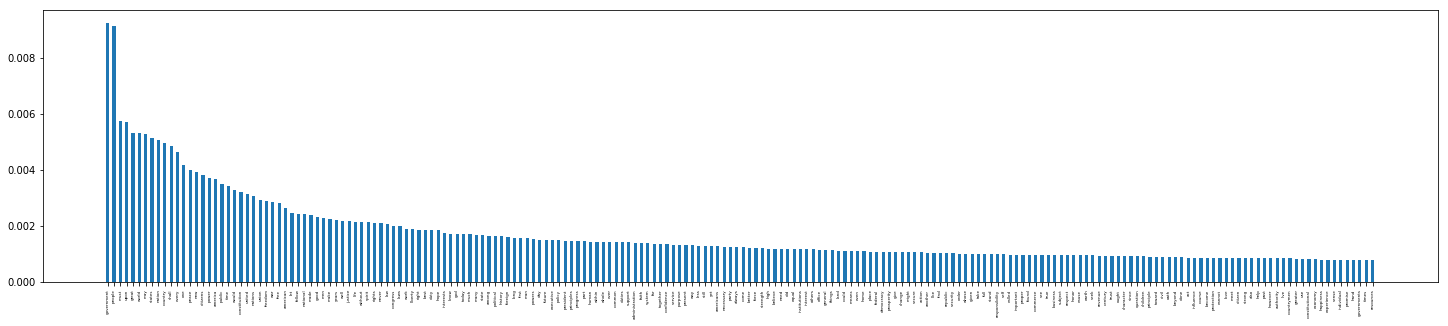

In [275]:
my_dict = {}
wcount=0
for word, count in fdist.most_common():       
    wcount=wcount+1
    my_dict[word]=count/tw
    if wcount>199:
        break
        
plt.figure(figsize=(25,5))
plt.xticks(rotation=90)
plt.bar(my_dict.keys(), my_dict.values(), width=.5)

### 6. Does the observed relative frequency of these words follow Zipf’s law? Explain.

In NLP, Zipf’s Law is a discrete probability distribution that tells you the probability of encountering a word in a given corpus. The input is the rank of a word (in terms of is frequency) so you can use this distribution to ask questions like:
* What is the probability of encountering the most common word in a corpus with 100,000 words?
* What is the probability of encountering the 10th most common word in a corpus of 100,000 words?
* What is the probability of encountering the least common word in a corpus of 100,000 words?
Source: https://medium.com/@_init_/using-zipfs-law-to-improve-neural-language-models-4c3d66e6d2f6

### 7. In what ways do you think the frequency of the words in this corpus differ from “all words in all corpora.